In [60]:
import pandas as pd
import numpy as np
import nltk
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

file = open("C:/Users/dhwan/OneDrive/Documents/Analytics_Vidya/bbcsports/bbc_sports_articles/003.txt", mode = "rt", encoding = "utf-8")
text = file.read()
file.close()

In [43]:
text

'Greene sets sights on world title\n\nMaurice Greene aims to wipe out the pain of losing his Olympic 100m title in Athens by winning a fourth World Championship crown this summer.\n\nHe had to settle for bronze in Greece behind fellow American Justin Gatlin and Francis Obikwelu of Portugal. "It really hurts to look at that medal. It was my mistake. I lost because of the things I did," said Greene, who races in Birmingham on Friday. "It\'s never going to happen again. My goal - I\'m going to win the worlds." Greene crossed the line just 0.02 seconds behind Gatlin, who won in 9.87 seconds in one of the closest and fastest sprints of all time. But Greene believes he lost the race and his title in the semi-finals. "In my semi-final race, I should have won the race but I was conserving energy. "That\'s when Francis Obikwelu came up and I took third because I didn\'t know he was there. "I believe that\'s what put me in lane seven in the final and, while I was in lane seven, I couldn\'t feel 

In [44]:
filenames = os.listdir("C:/Users/dhwan/OneDrive/Documents/Analytics_Vidya/bbcsports/bbc_sports_articles")
len(filenames)
filenames[:10]

['001.txt',
 '002.txt',
 '003.txt',
 '004.txt',
 '005.txt',
 '006.txt',
 '007.txt',
 '008.txt',
 '009.txt',
 '010.txt']

In [45]:
#to read multiple files at a time
articles = []
for f in filenames:
    file = open("C:/Users/dhwan/OneDrive/Documents/Analytics_Vidya/bbcsports/bbc_sports_articles/" +f, mode = "rt", encoding = "utf-8")
    file.close()
    articles.append(text)


In [46]:
len(articles)

471

In [47]:
# text cleaning 
clean_articles = []
for i in articles:
    clean_articles.append(i.replace("\n"," ").replace("\'"," ""'"))


In [48]:
# remove numbers, punctuation, special character
clean_articles = [re.sub("[^a-zA-Z]"," ",x) for x in clean_articles]

In [49]:
clean_articles[54]

'Greene sets sights on world title  Maurice Greene aims to wipe out the pain of losing his Olympic    m title in Athens by winning a fourth World Championship crown this summer   He had to settle for bronze in Greece behind fellow American Justin Gatlin and Francis Obikwelu of Portugal   It really hurts to look at that medal  It was my mistake  I lost because of the things I did   said Greene  who races in Birmingham on Friday   It  s never going to happen again  My goal   I  m going to win the worlds   Greene crossed the line just      seconds behind Gatlin  who won in      seconds in one of the closest and fastest sprints of all time  But Greene believes he lost the race and his title in the semi finals   In my semi final race  I should have won the race but I was conserving energy   That  s when Francis Obikwelu came up and I took third because I didn  t know he was there   I believe that  s what put me in lane seven in the final and  while I was in lane seven  I couldn  t feel anyt

In [50]:
# remove space
clean_articles = [' '.join([w for w in x.split() if len(w) > 1]) for x in clean_articles]

In [51]:
clean_articles[54]

'Greene sets sights on world title Maurice Greene aims to wipe out the pain of losing his Olympic title in Athens by winning fourth World Championship crown this summer He had to settle for bronze in Greece behind fellow American Justin Gatlin and Francis Obikwelu of Portugal It really hurts to look at that medal It was my mistake lost because of the things did said Greene who races in Birmingham on Friday It never going to happen again My goal going to win the worlds Greene crossed the line just seconds behind Gatlin who won in seconds in one of the closest and fastest sprints of all time But Greene believes he lost the race and his title in the semi finals In my semi final race should have won the race but was conserving energy That when Francis Obikwelu came up and took third because didn know he was there believe that what put me in lane seven in the final and while was in lane seven couldn feel anything in the race just felt like was running all alone believe if was in the middle 

In [52]:
type(clean_articles)

list

In [53]:
new_articles = [x.lower() for x in clean_articles]

In [54]:
new_articles[54]

'greene sets sights on world title maurice greene aims to wipe out the pain of losing his olympic title in athens by winning fourth world championship crown this summer he had to settle for bronze in greece behind fellow american justin gatlin and francis obikwelu of portugal it really hurts to look at that medal it was my mistake lost because of the things did said greene who races in birmingham on friday it never going to happen again my goal going to win the worlds greene crossed the line just seconds behind gatlin who won in seconds in one of the closest and fastest sprints of all time but greene believes he lost the race and his title in the semi finals in my semi final race should have won the race but was conserving energy that when francis obikwelu came up and took third because didn know he was there believe that what put me in lane seven in the final and while was in lane seven couldn feel anything in the race just felt like was running all alone believe if was in the middle 

In [55]:
#frequency of top 30 words 
def freq_words(x, terms=30):
    #combine all the articles
    text = ' '.join([text for text in x])
    #split text into words
    words = text.split()
    #prepare a dictionary of word frequency pairs
    words_dict = nltk.FreqDist(words)
    words_df = pd.DataFrame({'word':list(words_dict.keys()), 'count' :list(words_dict.values())})
    #select top n most frequent words
    d = words_df.nlargest(columns = 'count', n = terms)
    #plot the word counts
    plt.figure(figsize = (20,5))
    ax = sns.barplot(data = d, x = 'word', y = 'count')
    ax.set(ylabel = 'Count')
    plt.show()
    
    

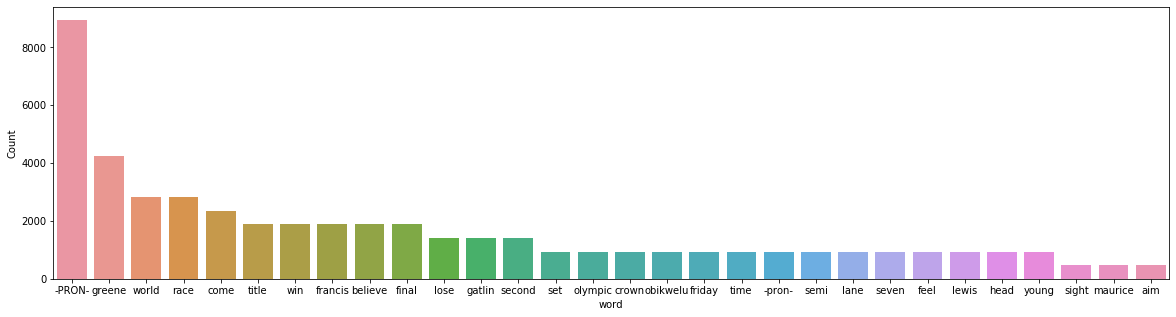

In [69]:
freq_words(new_articles)

In [70]:
#remove stop words (normalize- convert to root form- the text first)
nlp = spacy.load('en_core_web_sm')


In [71]:
#lemmatization 
new_articles = [' '.join([token.lemma_ for token in nlp(x)]) for x in new_articles]
#remove stopwords
new_articles = [' '.join([w for w in x.split() if nlp.vocab[w].is_stop == False]) for x in new_articles]

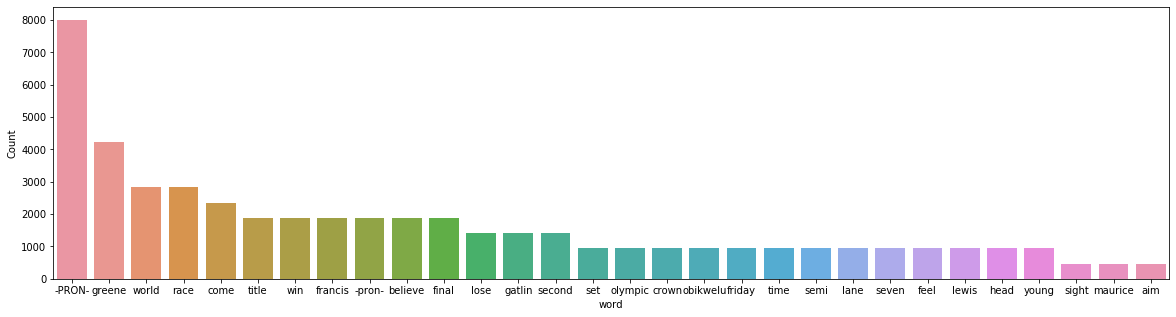

In [73]:
freq_words(new_articles)

In [74]:
#remove PRON, using the spacy library the pronouns are by default replaced by PRON
new_articles = [re.sub('-PRON-', '',i) for i in new_articles]

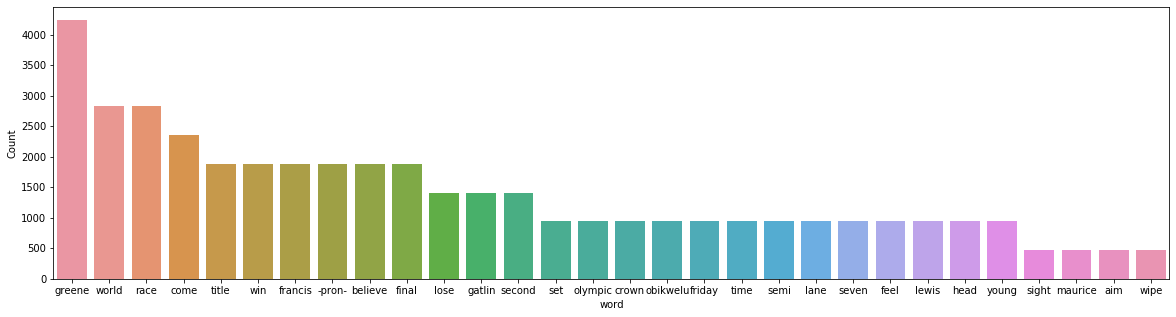

In [75]:
freq_words(new_articles)

##### LSA and NMF 
Main idea behind Latent Semantic Analysis is to group the words together having same occurance patterns in the entire data.- generally co-occur together.
LSA works in two steps: 
1. Represent the corpus as Document Term Matrix
2. Decompose the document into Document topic and topic term matrix using SVD (singular value decomposition)
SVD Singular Value Decomposition 

